# Real-world Data Wrangling

In [1]:
!python -m pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=f6ccd4b4b94383b08d6f88317ce46735791f2298b01e7e9817f786fd48314364
  Stored in directory: /home/parzival/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kaggle

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
For this project, I want to analyze the impact of different economic factors such as GDP, Inflation, Health expenditure, and different economic activities on life expectancy of Zimbabwe from 2000 to 2021. 

I will use 2 datasets to achieve this goal
- The first one is the [World Bank Data on Countries](https://www.kaggle.com/datasets/yusufglcan/country-data). This dataset contains information about GDP, Inflation, Health&Education Expenditures,...
- The second one is the [Life expectancy around the world](https://www.kaggle.com/datasets/mahdiehhajian/life-expectancy-around-the-world?select=life-expectancy.csv). This dataset contain the average life expectancy at birth of each country through times

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1 - [World Bank Data on Countries](https://www.kaggle.com/datasets/yusufglcan/country-data)**

Type: CSV File

Method: The data was gathered programatically by accessing Kaggle API.

Dataset variables:
*   Country and year
*   GDP Per Capita: GDP per capita calculates the average income of each individual in a country and is an indicator of living standards.
*   Inflation Rate: The inflation rate indicates the rate at which the general price level of goods and services rises, affecting a country's purchasing power.
*   Health Expenditures (% in GDP): This metric reflects the proportion of a country's GDP allocated to healthcare, highlighting its commitment to public health.
*   Agricultural Activities (% in GDP): This metric measures the contribution of the agricultural sector to a nation's economy.
*   Service Activities (% in GDP): The service sector's percentage of GDP shows the importance of services in economic activities.
*   Industrial Activities (% in GDP): Industrial activities as a percentage of GDP signify the role of manufacturing and industry in a country's economy.
*   ...

In [2]:
# Gathering data, unzip and remove the zip file (with done setting up the authentication)
kaggle.api.dataset_download_file("yusufglcan/country-data", "Countries.csv", path="./")
!unzip -o Countries.csv.zip
!rm -f Countries.csv.zip

Dataset URL: https://www.kaggle.com/datasets/yusufglcan/country-data
Archive:  Countries.csv.zip
  inflating: Countries.csv           


In [2]:
# Load the data
countries_df = pd.read_csv("Countries.csv")
countries_df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


In [3]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [4]:
COUNTRY_INTERESTED_FACTORS = ["Country Name", "Year", "GDP", "GDP Per Capita", "Health Expenditure"]

#### **Dataset 2 - [Life expectancy around the world](https://www.kaggle.com/datasets/mahdiehhajian/life-expectancy-around-the-world?select=life-expectancy.csv)**

Type: CSV File

Method: The data was gathered using the "Download" button from the Kaggle dashboard

Dataset variables:

*   Country and year
*   Life expectancy at birth, regardless of gender   

In [5]:
life_exp_df = pd.read_csv("life-expectancy.csv")
life_exp_df.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [6]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               20755 non-null  object 
 1   Code                                                 19061 non-null  object 
 2   Year                                                 20755 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  20755 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 648.7+ KB


In [7]:
LIFE_EXP_INTERESTED_FACTORS = ["Entity", "Year", "Period life expectancy at birth - Sex: all - Age: 0"]

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [128]:
#Optional: store the raw data in your local data store
!mkdir -p data/raw
!mv Countries.csv data/raw
!mv life-expectancy.csv data/raw

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [8]:
countries_df[COUNTRY_INTERESTED_FACTORS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        5106 non-null   object 
 1   Year                5106 non-null   int64  
 2   GDP                 5037 non-null   float64
 3   GDP Per Capita      5037 non-null   float64
 4   Health Expenditure  4531 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 199.6+ KB


In [9]:
countries_df[COUNTRY_INTERESTED_FACTORS].isnull().sum()

Country Name            0
Year                    0
GDP                    69
GDP Per Capita         69
Health Expenditure    575
dtype: int64

**Issue**: The analysis focus about factors like GDP per capita, Inflation Rate, Health Expenditure and Economics activities. Among those factor, "Inflation Rate" and "Health Expenditure" have the most significant number of null values (i.e missing values), which are above five hundreds occurences. Other columns have lower number of missing values, ranging from two hundreds to about 69 occurences. These missing values could probably affect the result of the analysis

**Justification**: All of the interested columns contains missing values above are crucial for the analysis. Therefore, it is essential to either fill in these missing values or decide on an appropriate method to handle them such as by removing rows that contain missing values 

### Quality Issue 2:

In [10]:
# Examining the uniqueness of the data
countries_df[["Country Name", "Country Code", "Year"]].duplicated().sum()

161

In [11]:
# I wonder maybe those duplicates are part of the missing values above, let's check to see if that's the case
countries_df.dropna()[["Country Name", "Country Code", "Year"]].duplicated().sum()

161

**Issue**: There are 161 duplicated rows in the dataset. These rows are different from the null values. These duplicated rows will affect the analysis result.

**Justification**: We will drop these duplicated rows to ensure the uniqueness quality of the data

### Tidiness Issue 1:

In [12]:
print("Columns in countries_df: ")
countries_df.columns

Columns in countries_df: 


Index(['Country Name', 'Country Code', 'Year', 'Agriculture (% GDP)',
       'Ease of Doing Business', 'Education Expenditure (% GDP)',
       'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)',
       'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)',
       'Unemployment', 'Population', 'Land', 'Continent Name', 'Export',
       'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade',
       'GDP Per Capita', 'Population Density'],
      dtype='object')

In [13]:
countries = list(countries_df["Country Name"].unique())
print(f"Number of unique countries: {len(countries)}. \nE.G: {', '.join(countries[:5])}, ...")


Number of unique countries: 215. 
E.G: Afghanistan, Albania, Algeria, American Samoa, Andorra, ...


**Issue and Justification**: Many columns like Country Code, Import, Export, ... are considered non-neccessary for the purpose of analyzing the life expectancy of a country and should be removed to make the dataframe cleaner. Other than that, there are around 215 different countries in the dataset, however, this analysis only care for Zimbabwe, so it should also be filtered to make the dataframe more concise.

### Tidiness Issue 2: 

In [14]:
countries_df[COUNTRY_INTERESTED_FACTORS].head()

,Country Name,Year,GDP,GDP Per Capita,Health Expenditure
0,Afghanistan,2000,1.415197e+10,724.145910,1.542930e+09
1,Afghanistan,2001,1.415197e+10,718.788917,1.542930e+09
2,Afghanistan,2002,3.854235e+09,183.532775,3.639705e+08
3,Afghanistan,2003,4.539497e+09,200.462376,4.058881e+08
4,Afghanistan,2004,5.220825e+09,221.657662,5.120832e+08


In [15]:
life_exp_df[LIFE_EXP_INTERESTED_FACTORS].head()

,Entity,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,1950,27.7275
1,Afghanistan,1951,27.9634
2,Afghanistan,1952,28.4456
3,Afghanistan,1953,28.9304
4,Afghanistan,1954,29.2258


**Issue and justification**: As we want to analyze the impact of economic factors on life expectancy and we are having 2 different dataframe, therefore, we should merge them together before doing analysis in order to fulfill the rule "Each type of observational unit forms a table". Beside, the column name that indicate the country, which we will use as the key to merge is different ("Country Name" vs "Entity")

## 3. Clean data

In [16]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
cleaned_countries_df = countries_df.copy()
cleaned_life_exp_df = life_exp_df.copy()

### **Quality Issue 1: Missing values**

In [17]:
# Remove missing values rows
cleaned_countries_df = cleaned_countries_df.dropna(subset=COUNTRY_INTERESTED_FACTORS)
cleaned_life_exp_df = cleaned_life_exp_df.dropna(subset=LIFE_EXP_INTERESTED_FACTORS)

In [18]:
# Validate the cleaning was successful
print(f"Countries_df: \n\t - Remove: {len(countries_df) - len(cleaned_countries_df)} rows \n\t - Total missing values left: {cleaned_countries_df.isnull().sum().sum()}")
print(f"Life_exp_df: \n\t - Remove: {len(life_exp_df) - len(cleaned_life_exp_df)} rows \n\t - Total missing values left: {cleaned_life_exp_df.isnull().sum().sum()}")
cleaned_countries_df.isnull().sum()

Countries_df: 
	 - Remove: 575 rows 
	 - Total missing values left: 3657
Life_exp_df: 
	 - Remove: 0 rows 
	 - Total missing values left: 1694


Country Name                        0
Country Code                        0
Year                                0
Agriculture (% GDP)                46
Ease of Doing Business            138
Education Expenditure (% GDP)     115
Export (% GDP)                    299
GDP                                 0
Health Expenditure (% GDP)          0
Import (% GDP)                    299
Industry (% GDP)                   23
Inflation Rate                    161
R&D                              1173
Service (% GDP)                    69
Unemployment                      322
Population                          0
Land                                0
Continent Name                      0
Export                            299
Import                            299
Education Expenditure             115
Health Expenditure                  0
Net Trade                         299
GDP Per Capita                      0
Population Density                  0
dtype: int64

**Justification**: Remove missing values to ensures completeness of the dataset.

### **Quality Issue 2: Duplicates**

In [19]:
# Remove duplicates from the datasets
n_before_countries_df = len(cleaned_countries_df)
cleaned_countries_df = cleaned_countries_df.drop_duplicates(["Country Name", "Country Code", "Year"])

n_before_life_exp_df = len(cleaned_life_exp_df)
cleaned_life_exp_df = cleaned_life_exp_df.drop_duplicates(["Entity", "Year"])

In [20]:
# Validate the cleaning was successful
print(f"Countries_df: \n\t - Remove: {n_before_countries_df - len(cleaned_countries_df)} rows \n\t - Total duplicates left: {cleaned_countries_df.duplicated(['Country Name', 'Country Code', 'Year']).sum()}")
print(f"Life_exp_df: \n\t - Remove: {n_before_life_exp_df - len(cleaned_life_exp_df)} rows \n\t - Total duplicates left: {cleaned_life_exp_df.duplicated(['Entity', 'Year']).sum()}")

Countries_df: 
	 - Remove: 161 rows 
	 - Total duplicates left: 0
Life_exp_df: 
	 - Remove: 0 rows 
	 - Total duplicates left: 0


**Justification**: Make sure there is no duplicated observations in the dataset. This step ensures the uniqueness, as well as the accuracy property of the dataset

In [21]:
cleaned_countries_df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Population,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19542982.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,19688632.0,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,21000256.0,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,22645130.0,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,23553551.0,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491


### **Tidiness Issue 1: Redundant factors**

In [22]:
# Remove redundant columns
cleaned_countries_df = cleaned_countries_df[COUNTRY_INTERESTED_FACTORS]
cleaned_life_exp_df = cleaned_life_exp_df[LIFE_EXP_INTERESTED_FACTORS]
# Filter relevant columns value, keep only records for Zimbabwe in 2000-2021
cleaned_countries_df = cleaned_countries_df[(cleaned_countries_df["Country Name"] == "Zimbabwe") & (cleaned_countries_df["Year"] >= 2000) & (cleaned_countries_df["Year"] <= 2021)]
cleaned_life_exp_df = cleaned_life_exp_df[(cleaned_life_exp_df["Entity"] == "Zimbabwe") & (cleaned_life_exp_df["Year"] >= 2000) & (cleaned_life_exp_df["Year"] <= 2021)]

In [23]:
cleaned_countries_df.head()

,Country Name,Year,GDP,GDP Per Capita,Health Expenditure
5083,Zimbabwe,2000,6.689958e+09,565.284390,4.485554e+08
5084,Zimbabwe,2001,6.777385e+09,569.003209,4.544173e+08
5085,Zimbabwe,2002,6.342116e+09,529.186883,4.252330e+08
5086,Zimbabwe,2003,5.727592e+09,474.302201,3.840297e+08
5087,Zimbabwe,2004,5.805598e+09,477.399491,3.892599e+08


In [24]:
cleaned_life_exp_df.tail()

,Entity,Year,Period life expectancy at birth - Sex: all - Age: 0
20750,Zimbabwe,2017,60.7095
20751,Zimbabwe,2018,61.4141
20752,Zimbabwe,2019,61.2925
20753,Zimbabwe,2020,61.1242
20754,Zimbabwe,2021,59.2531


**Justification**: Remove unneccessary columns and rows, to make the dataframe more concise

### **Remove unnecessary variables and combine datasets**

In [25]:
# Rename columns
cleaned_life_exp_df = cleaned_life_exp_df.rename(columns={"Entity": "Country Name", "Period life expectancy at birth - Sex: all - Age: 0": "Life Expectancy"})
cleaned_life_exp_df.head()

,Country Name,Year,Life Expectancy
20733,Zimbabwe,2000,44.6864
20734,Zimbabwe,2001,41.9572
20735,Zimbabwe,2002,44.5654
20736,Zimbabwe,2003,43.3926
20737,Zimbabwe,2004,44.5023


In [26]:
merged_df = pd.merge(cleaned_countries_df, cleaned_life_exp_df, on=["Country Name", "Year"], how="inner", validate="one_to_one")
merged_df

,Country Name,Year,GDP,GDP Per Capita,Health Expenditure,Life Expectancy
0,Zimbabwe,2000,6.689958e+09,565.284390,4.485554e+08,44.6864
1,Zimbabwe,2001,6.777385e+09,569.003209,4.544173e+08,41.9572
2,Zimbabwe,2002,6.342116e+09,529.186883,4.252330e+08,44.5654
3,Zimbabwe,2003,5.727592e+09,474.302201,3.840297e+08,43.3926
4,Zimbabwe,2004,5.805598e+09,477.399491,3.892599e+08,44.5023
5,Zimbabwe,2005,5.755215e+09,470.783761,3.858818e+08,44.7677
6,Zimbabwe,2006,5.443896e+09,441.498797,3.650082e+08,45.3635
7,Zimbabwe,2007,5.291950e+09,425.036842,3.548203e+08,45.6102
8,Zimbabwe,2008,4.415703e+09,351.839101,2.960687e+08,46.7232
9,Zimbabwe,2009,9.665793e+09,762.297960,6.480824e+08,48.0625


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [27]:
!mkdir -p data/processed
cleaned_countries_df.to_csv("data/processed/cleaned_countries_zimbabwe_2000_2021.csv", index=False)
cleaned_life_exp_df.to_csv("data/processed/cleaned_life_exp_zimbabwe_2000_2021.csv", index=False)

## 5. Answer the research question

*Research question:* What is the factor that most influence the life expectancy of Zimbabwe from 2000-2021

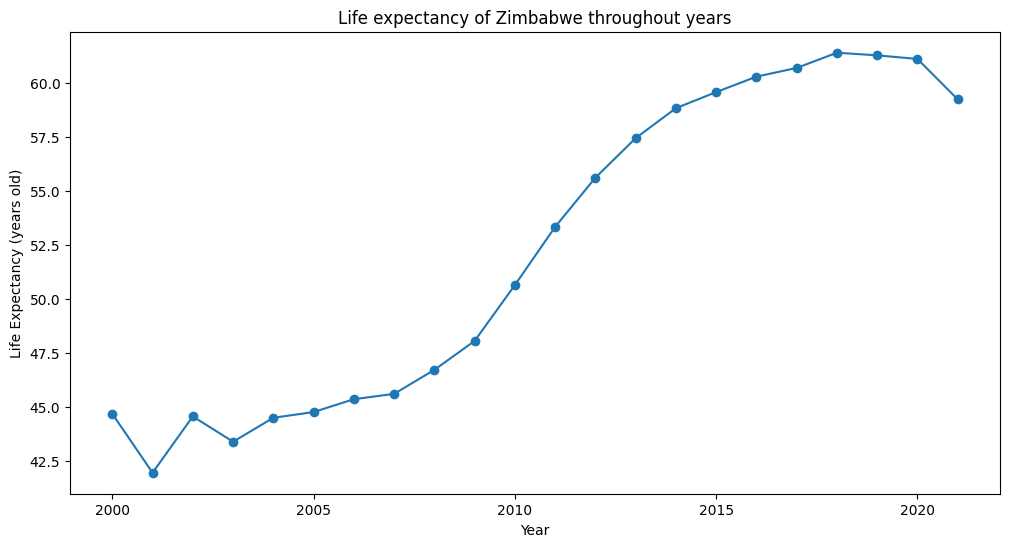

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Year"], merged_df["Life Expectancy"], marker="o")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years old)")
plt.title("Life expectancy of Zimbabwe throughout years")
plt.show()

This plot show the life expectancy of Zimbabwe in 2000-2021. It is clearly that there is an upward trend in the number of year for the life expectancy. It was lower than 50 in the early 2000s, but nowaday, it has become over 60. Let see if GDP or Health Expenditure contribute to this number

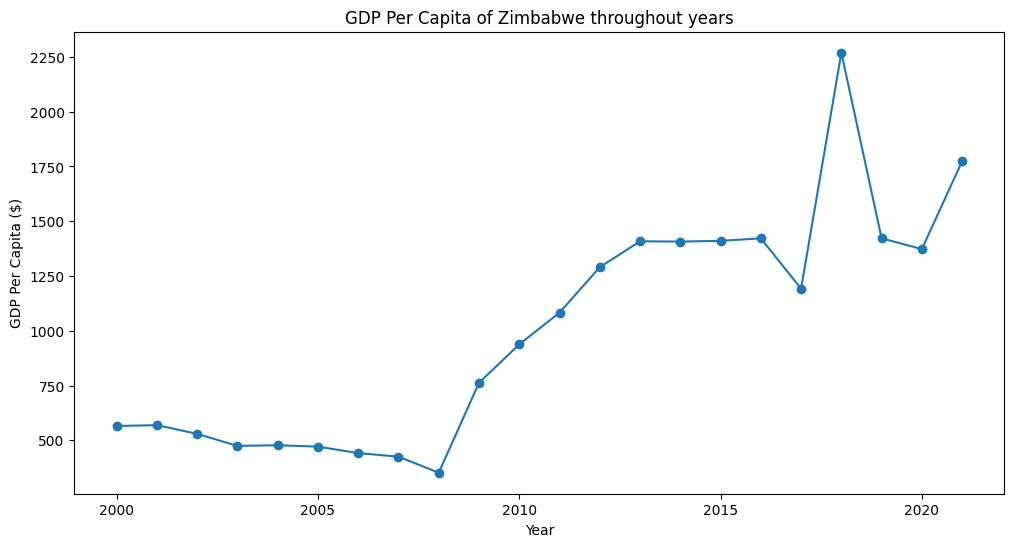

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Year"], merged_df["GDP Per Capita"], marker="o")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita ($)")
plt.title("GDP Per Capita of Zimbabwe throughout years")
plt.show()

It is clear that there also an upward trend in the GDP per capita of Zimbabwe residence. This also indicate the living standards of Zimbabwe have been improved in this period

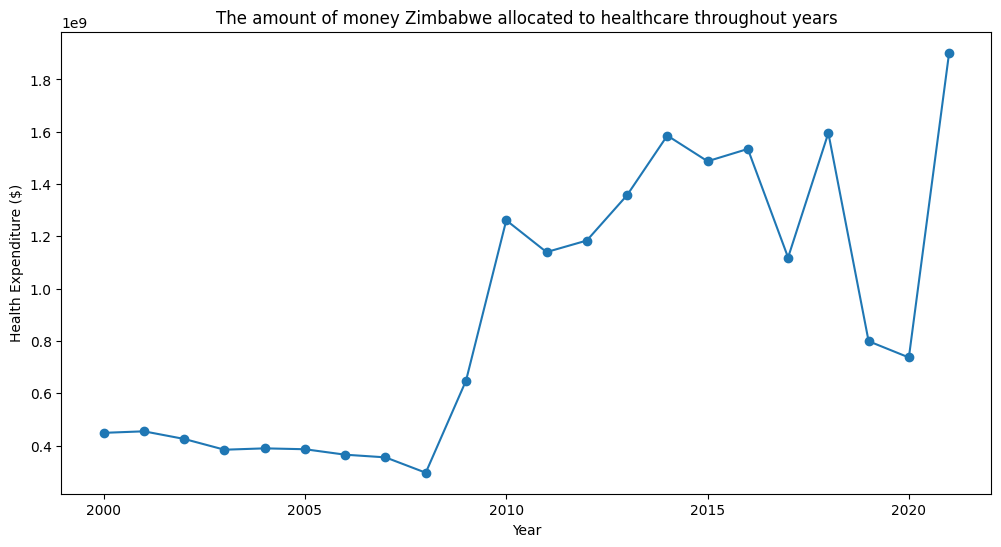

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Year"], merged_df["Health Expenditure"], marker="o")
plt.xlabel("Year")
plt.ylabel("Health Expenditure ($)")
plt.title("The amount of money Zimbabwe allocated to healthcare throughout years")
plt.show()

It is clear that there also an upward trend in the anmount of money that Zimbabwe's government spend on community health care. This also highlight the commitment to public health of Zimbabwe

In [38]:
# Correlation of the data
merged_df[["GDP Per Capita", "Health Expenditure", "Life Expectancy"]].corr()

,GDP Per Capita,Health Expenditure,Life Expectancy
GDP Per Capita,1.000000,0.887168,0.914693
Health Expenditure,0.887168,1.000000,0.818613
Life Expectancy,0.914693,0.818613,1.000000


Text(0.5, 0.98, 'Life Expectancy vs GDP Per Capita and Health Expenditure')

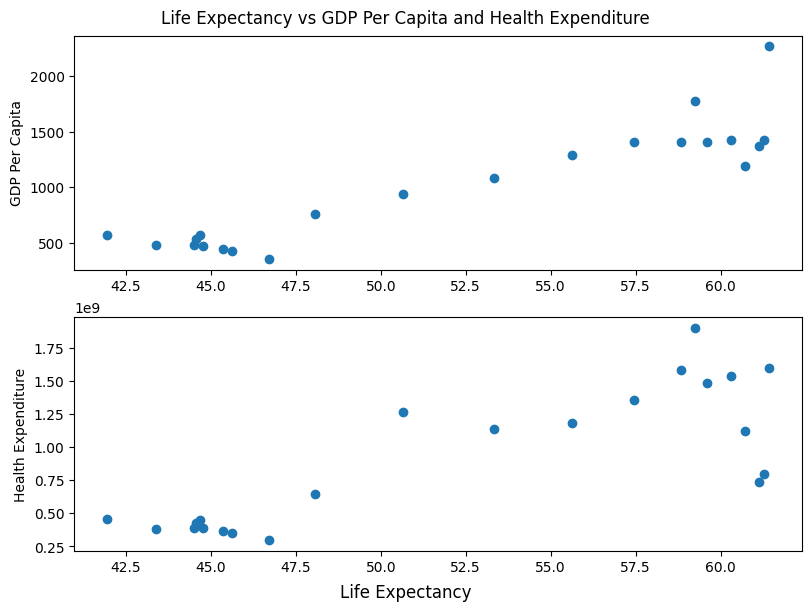

In [60]:
figure, axis = plt.subplots(2, 1, constrained_layout=True, figsize=(8, 6))
axis[0].scatter(merged_df["Life Expectancy"], merged_df["GDP Per Capita"])
axis[1].scatter(merged_df["Life Expectancy"], merged_df["Health Expenditure"])
figure.supxlabel("Life Expectancy")
axis[0].set_ylabel("GDP Per Capita")
axis[1].set_ylabel("Health Expenditure")
figure.suptitle("Life Expectancy vs GDP Per Capita and Health Expenditure")

The plots and the correlation number in the table illustrate that there are correlations between Life Expectancy and GDP Per Capita and Health Expenditure. In other words, there are correlation between the life expectancy of Zimbabwe resident and their life quality, living standard and government's commitment to society health

### **5.2:** Reflection
Given more time for this project and these datasets, I would like to investigate more about other economic factors that influence on the life expectancy of Zimbabwe. There could be some economic trends in agriculture, industry and services. After that, I also would like to build a machine learning model with all the features founded to predict the life expectancy of people based on economic factors. Moreover, I will do the same research about other country that has lower life expectancy than other developed countries in the world